In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import os

from dat_to_nc import DatToNcConverter

In [2]:
# open some era5 file
file = '/work/bm1159/XCES/xces-work/k203179/data_sets_era5-crop_marshall/tas_1hr_reanalysis_era5_r1i1p1_20170301-20170331.nc'

ds = xr.open_dataset(file)
    
first_time_step_ds = ds.isel(time=0)

lats = first_time_step_ds.lat.values
lons = first_time_step_ds.lon.values

tas = first_time_step_ds.tas.values.shape

print(lats)
print(lons)
print(tas)  # (lat, lon)
print(ds.tas.values.shape) # (lat, lon)
      

[38.92270253 39.20373283 39.48476313 39.76579343 40.04682373 40.32785403
 40.60888433 40.88991463]
[253.6875  253.96875 254.25    254.53125 254.8125  255.09375 255.375
 255.65625]
(8, 8)
(744, 8, 8)


In [3]:
test_converter = DatToNcConverter("Marshall", hourly=False, target_directory="./test_mapped", grid_blueprint="/work/bm1159/XCES/xces-work/k203179/data_sets_era5-crop_marshall/tas_1hr_reanalysis_era5_r1i1p1_20170301-20170331.nc")
test_converter.execute()

  0%|          | 0/2465 [00:00<?, ?it/s]

100%|██████████| 2465/2465 [02:01<00:00, 20.24it/s]


8x8
(59151,)
Saving to ./test_mappedmarshall.nc


In [4]:
test_converter.dataframe.tas.values[0].shape

(8, 8)

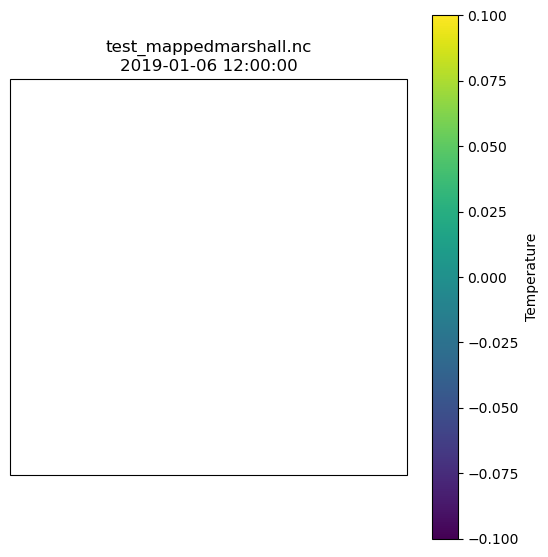

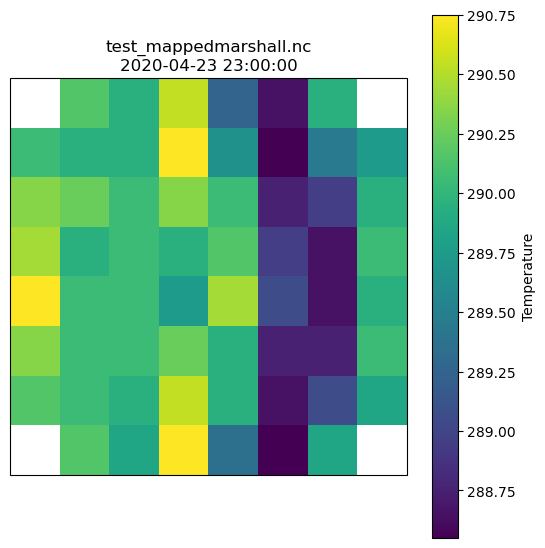

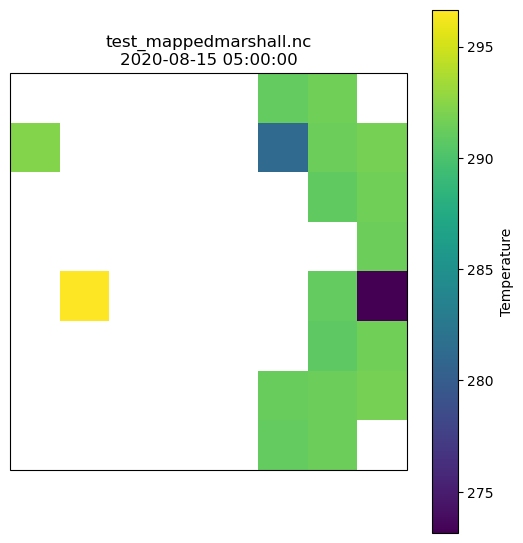

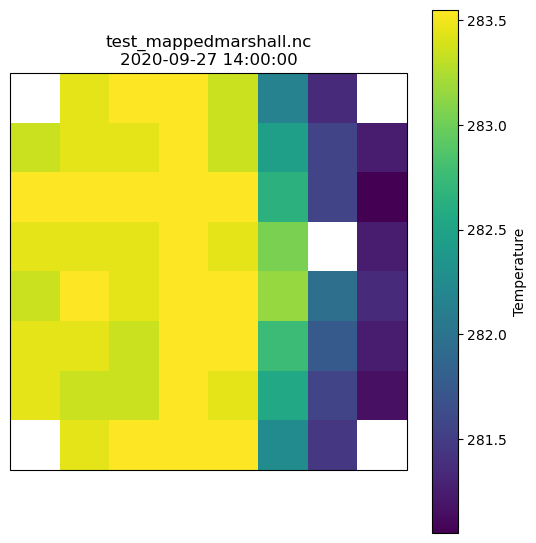

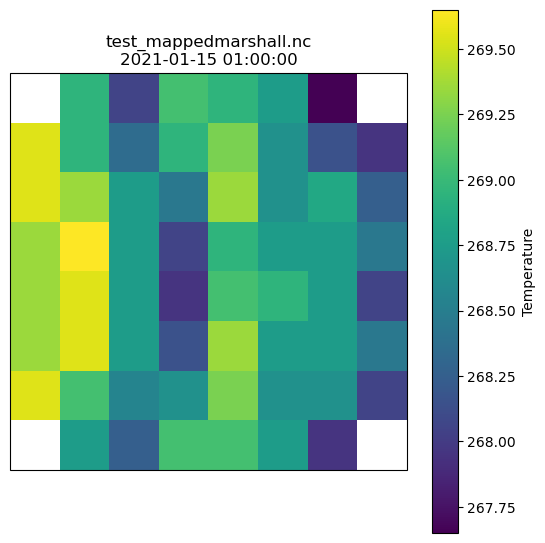

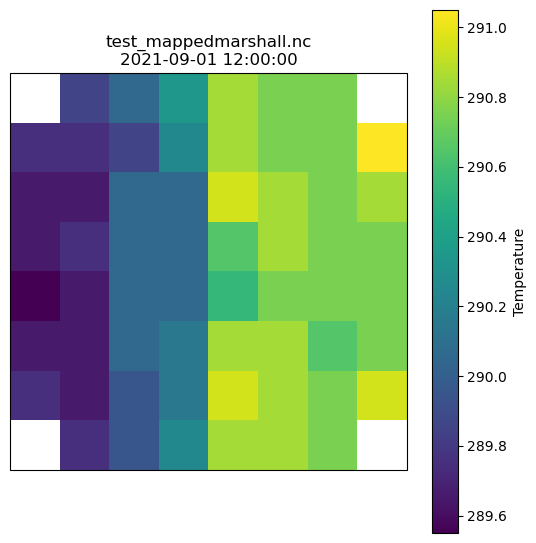

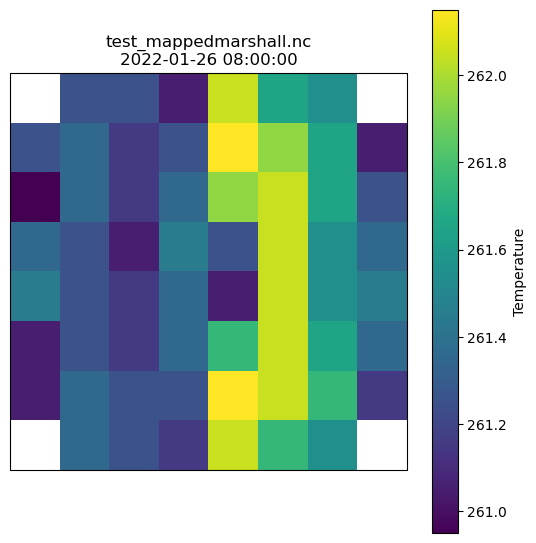

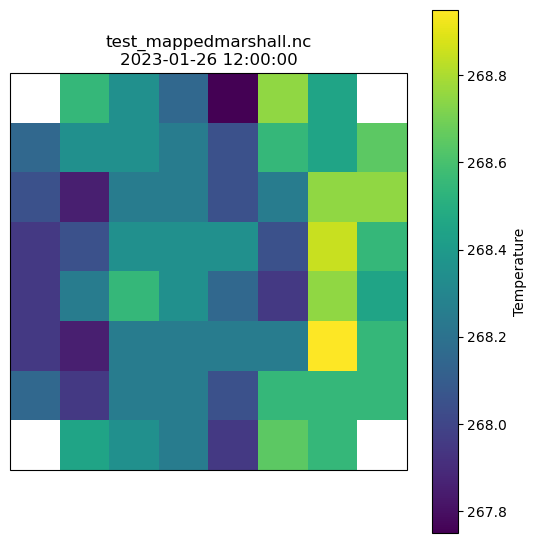

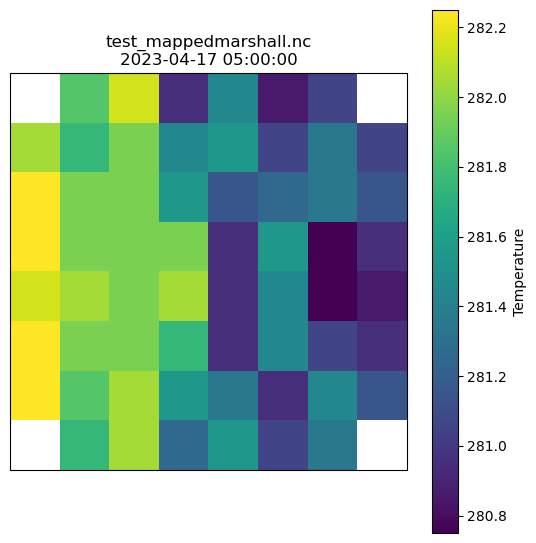

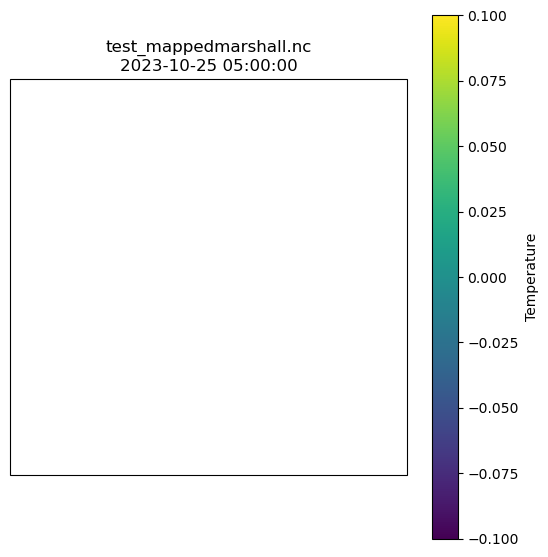

In [8]:
from utils import DataSet, DatasetPlotter

plotter = DatasetPlotter(DataSet("test_mappedmarshall.nc"))
plotter.generate_time_index_list(10)
plotter.plot()